In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [212]:
# 데이터 준비

columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

mpg_df = pd.read_csv("drive/MyDrive/Colab Notebooks/data_files/auto-mpg.data", names = columns,
                     sep = " ", na_values="?", comment="\t", skipinitialspace=True)
# skipinitialspace=True 입력이 중간 공백이 하나가 아니라 여러개라 ' '한개로 주면 데이터로 보려다 에러남.
# 그래서 ' '다음이 다 데이터로 인식되는데, 데이터의 앞에 있는 ' ' 공백들은 무시하라는 것.
# comment="\t" 탭 다음은 커멘트라고 하는 것. > 그래서 무시 함

mpg_df.head() # mpg = 마일 퍼 갤런

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [125]:
mpg_df['origin'].value_counts()

,count
origin,
1,249
3,79
2,70


# 데이터 준비 2
### 1. mpg 컬럼을 y로 나머지 컬럼을 x로 분할
### 2. origin 컬럼을 one-hot-encdoing 처리
### 3. 회귀모델 만들기 mpg(y)를 예측하는 회귀모델
### 4. 훈련데이터 평가
(4번이 회귀모델 이걸 참고)

In [76]:
print(mpg_df.isna().sum())
mpg_df = mpg_df.dropna().reset_index(drop=True)
mpg_df.info()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


In [79]:
# 1. X, y 데이터 분할

X = mpg_df.drop(columns="mpg")
y = mpg_df["mpg"]

print(X.shape, y.shape)

(392, 7) (392,)


In [80]:
# 2. origin 컬럼을 one-hot-encdoing 처리

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X_origin = ohe.fit_transform(X[['origin']])

print(X.shape, y.shape, X_origin.shape)

(392, 7) (392,) (392, 3)


In [81]:
X = pd.concat([X.drop(columns='origin'), pd.DataFrame(X_origin.toarray())], axis=1)
print(X.shape, y.shape, X_origin.shape)

(392, 9) (392,) (392, 3)


In [102]:
# 3. 회귀모델 만들기 mpg(y)를 예측하는 회귀모델

model = tf_keras.Sequential()
model.add(tf_keras.layers.Input(shape=(9, )))
model.add(tf_keras.layers.Dense(392, activation=tf_keras.layers.ReLU())) # 클래스 사용 : 세부사항 정의 가능
model.add(tf_keras.layers.Dense(256, activation='relu')) # 문자열 사용 : 기본 값 적용
model.add(tf_keras.layers.Dense(128, activation='relu')) # 문자열 사용 : 기본 값 적용
model.add(tf_keras.layers.Dense(64, activation='relu')) # 문자열 사용 : 기본 값 적용
model.add(tf_keras.layers.Dense(32, activation='relu')) # 문자열 사용 : 기본 값 적용
model.add(tf_keras.layers.Dense(1)) # 출력층 : 회귀의 출력층 유닛갯수는 1개, 출력함수는 항등함수(지정하지 않음)

In [103]:
# 모델 요약 출력 model.summary()는 모델 컴파일 전에 호출
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 392)                 │           3,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 256)                 │         100,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,793 (577.32 KB)

 Trainable params: 147,793 (577.32 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse', 'mae'])

In [105]:
model.fit(X, y, batch_size=32, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2142.7686 - mae: 37.3231 - mse: 2142.7686
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 320.9167 - mae: 14.6207 - mse: 320.9167 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 161.4247 - mae: 10.4631 - mse: 161.4247
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 180.3673 - mae: 11.2771 - mse: 180.3673
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 113.4275 - mae: 8.5982 - mse: 113.4275
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102.9317 - mae: 8.0679 - mse: 102.9317 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.2480 - mae: 7.5837 - mse: 90.2480
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 143.5702 - mae: 9.9894 - mse: 143.5702 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 137.2770 - mae: 9.7113 - mse: 137.2770
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 74.9964 - mae: 6.7451 - mse: 74.9964
Epoch 11/100
1

In [106]:
# 4. 훈련데이터 평가

train_eval = model.evaluate(X, y)
train_eval

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8340 - mae: 2.0245 - mse: 7.8340  


[13.168270111083984, 13.168270111083984, 2.561190128326416]

In [107]:
print( y.mean() )
print( train_eval[2] / y.mean() )

23.445918367346938
0.10923820889410663


In [108]:
# 값 예측

model.predict(X[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[15.098007],
       [14.839179],
       [15.411311],
       [15.411041],
       [15.081829],
       [12.946218],
       [13.001822],
       [12.970167],
       [12.906166],
       [14.228929]], dtype=float32)

# 선생님과 함께

In [172]:
# 데이터 준비 2-1

mpg_df.dropna(inplace=True)
y = mpg_df['mpg']
X = mpg_df.drop('mpg', axis = 1)

X.shape, y.shape

((392, 7), (392,))

In [173]:
# 데이터 준비 2-2

ohe_origin = pd.get_dummies(X['origin']).astype(int)
X = pd.concat([X.drop('origin', axis=1), ohe_origin], axis=1)
X.rename(columns={1: 'USA', 2: 'Europe', 3: 'Japan'}, inplace=True)
X.head()

X = X.values

In [174]:
X.shape

(392, 9)

In [175]:
# 모델 구조 설계

model = tf_keras.Sequential()
model.add(tf_keras.layers.Input(shape=(9, )))
model.add(tf_keras.layers.Dense(64, activation='relu'))
model.add(tf_keras.layers.Dense(32, activation='relu'))
model.add(tf_keras.layers.Dense(1)) # 회귀 모델의 경우 출력층의 유닛갯수는 1

In [176]:
# 모델 훈련 설계

model.compile(loss = "mse",
              optimizer = "adam",
              metrics=['mae'])

In [177]:
# 모델 학습 (훈련)

fit_history = model.fit(X, y, batch_size=16, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 211133.9844 - mae: 403.2527
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3985.0662 - mae: 57.2193 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 173.7849 - mae: 11.2247
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.0927 - mae: 6.8412  
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.3778 - mae: 6.5526 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.5979 - mae: 6.3093 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.0699 - mae: 6.5391 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.8480 - mae: 6.6540 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.4792 - mae: 6.1343 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.3644 - mae: 6.6475  
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.2391 - mae: 6.3641 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.1742 - mae: 5.9454 
Ep

In [182]:
print(model.evaluate(X, y)[1], y.mean())
print(model.evaluate(X, y)[1] / y.mean())


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.2922 - mae: 3.0311 
3.319185256958008 23.445918367346938
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.2922 - mae: 3.0311 
0.14156772214905547


In [179]:
fit_history.history.keys()

dict_keys(['loss', 'mae'])

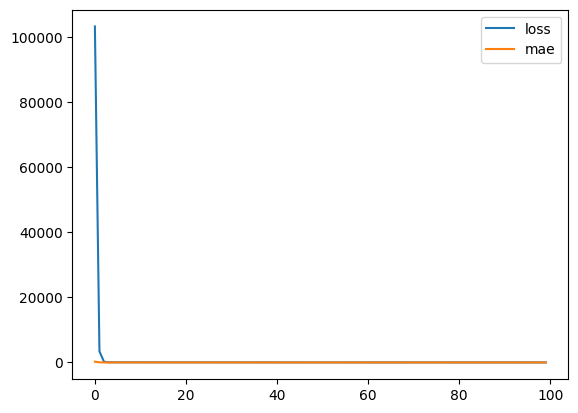

In [180]:
plt.plot(fit_history.epoch, fit_history.history['loss'], label = 'loss')
plt.plot(fit_history.epoch, fit_history.history['mae'], label = 'mae')
plt.legend()
plt.show()

# 학습률 조정

In [184]:
# 모델 구조 설계

model = tf_keras.Sequential()
model.add(tf_keras.layers.Input(shape=(9, )))
model.add(tf_keras.layers.Dense(64, activation='relu'))
model.add(tf_keras.layers.Dense(32, activation='relu'))
model.add(tf_keras.layers.Dense(1)) # 회귀 모델의 경우 출력층의 유닛갯수는 1

In [185]:
# 모델 훈련 설계

model.compile(loss = "mse",
              optimizer = tf_keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

In [187]:
# 모델 학습 (훈련)

fit_history = model.fit(X, y, batch_size=16, epochs=1000)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122.4964 - mae: 9.0757
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.4191 - mae: 8.9576   
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91.9948 - mae: 7.5791 
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92.4099 - mae: 7.5700  
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95.3189 - mae: 7.7922   
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90.9673 - mae: 7.7679  
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78.9665 - mae: 7.0311 
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75.4584 - mae: 6.9391 
Epoch 9/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80.0912 - mae: 7.2325 
Epoch 10/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66.8100 - mae: 6.6300 
Epoch 11/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 62.8296 - mae: 6.3988 
Epoch 12/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66.5833 - mae: 6.

In [196]:
print(model.evaluate(X, y)[1], y.mean())
print(model.evaluate(X, y)[1] / y.mean())
print(fit_history.history.keys())

print(np.min(fit_history.history['loss']))
print(np.min(fit_history.history['mae']))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5819 - mae: 1.7796
1.9618706703186035 23.445918367346938
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5819 - mae: 1.7796 
0.08367642672725907
dict_keys(['loss', 'mae'])
7.675467491149902
2.0366477966308594


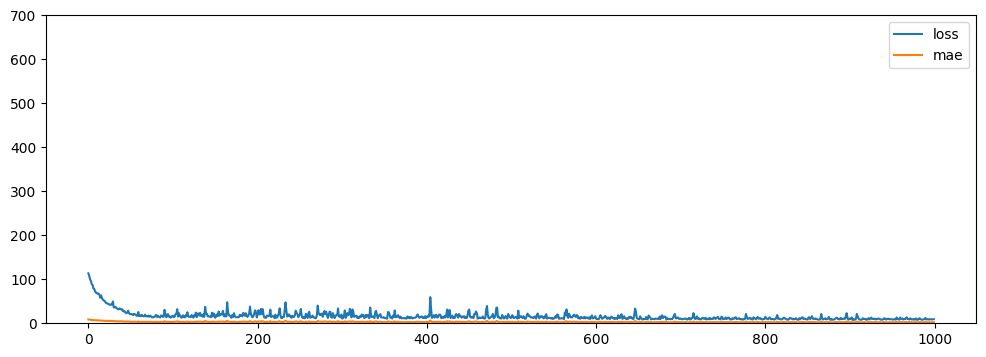

In [193]:
plt.figure(figsize=(12, 4))
plt.plot(fit_history.epoch, fit_history.history['loss'], label = 'loss')
plt.plot(fit_history.epoch, fit_history.history['mae'], label = 'mae')
plt.legend()
plt.ylim(0, 700)
plt.show()

# 배치사이즈 조정 및 스케일링

In [213]:
# 데이터 준비 2-1

mpg_df.dropna(inplace=True)
y = mpg_df['mpg']
X = mpg_df.drop('mpg', axis = 1)

X.shape, y.shape

((392, 7), (392,))

In [214]:
# 데이터 준비 2-2

ohe_orgin = pd.get_dummies(X['origin']).astype(int)
X = pd.concat([X.drop('origin', axis=1), ohe_orgin], axis=1)
X.rename(columns={1: "USA", 2: "Europe", 3: "Japan"}, inplace=True)

In [215]:
# 데이터 준비 2-3

from sklearn.preprocessing import MinMaxScaler
# , SttandardScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)

# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.fit_transform(X)

In [221]:
# 모델 구조 설계

model = tf_keras.Sequential()
model.add(tf_keras.layers.Input(shape=(9, )))
model.add(tf_keras.layers.Dense(64, activation='relu'))
model.add(tf_keras.layers.Dense(32, activation='relu'))
model.add(tf_keras.layers.Dense(1)) # 회귀 모델의 경우 출력층의 유닛갯수는 1

In [222]:
# 모델 훈련 설계

model.compile(loss = "mse",
              optimizer = tf_keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

In [223]:
# 모델 학습 (훈련)

fit_history = model.fit(X, y, batch_size=32, epochs=1000, validation_split=0.2)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 515.8595 - mae: 21.5779 - val_loss: 1007.5053 - val_mae: 31.1558
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 458.0095 - mae: 20.2614 - val_loss: 978.1236 - val_mae: 30.6714
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 440.7108 - mae: 19.7731 - val_loss: 937.8589 - val_mae: 29.9958
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 400.9146 - mae: 18.8361 - val_loss: 882.1985 - val_mae: 29.0360
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 371.6215 - mae: 17.9708 - val_loss: 806.0539 - val_mae: 27.6701
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 332.7261 - mae: 16.6004 - val_loss: 707.2538 - val_mae: 25.7854
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 266.5994 - mae: 14.0859 - val_loss: 589.9460 - val_mae: 23.3430
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 209.3434 - mae: 11.7923 - val_loss: 463.9506 - val_mae: 20.3816
Epoch 

In [227]:
print(model.evaluate(X, y)[1], y.mean())
print(model.evaluate(X, y)[1] / y.mean())
print(fit_history.history.keys())

# print(np.min(fit_history.history['loss']))
# print(np.min(fit_history.history['mae']))
print(np.min(fit_history.history['mae']))
print(np.min(fit_history.history['val_mae']))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2226 - mae: 1.2335 
1.676064372062683 23.445918367346938
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2226 - mae: 1.2335 
0.07148640312579664
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
1.2495516538619995
3.0700392723083496


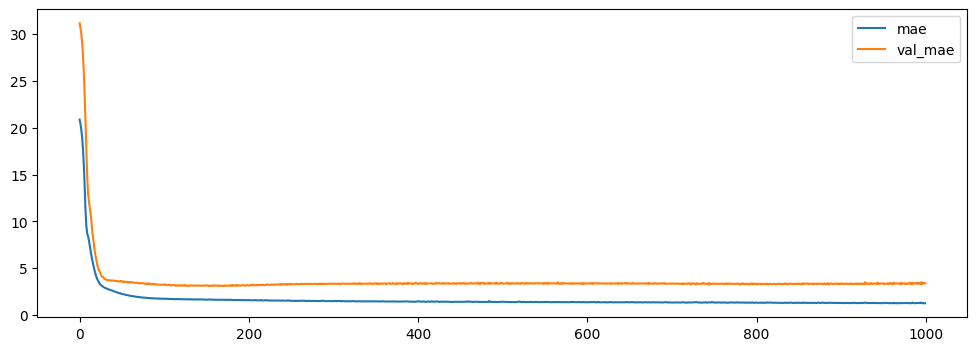

In [226]:
plt.figure(figsize=(12, 4))
plt.plot(fit_history.epoch, fit_history.history['mae'], label = 'mae')
plt.plot(fit_history.epoch, fit_history.history['val_mae'], label = 'val_mae')
plt.legend()
plt.show()